# Exploring marathon finishing times

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('http://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')

In [3]:
df.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [4]:
df.split = pd.to_timedelta(df.split)
df.final = pd.to_timedelta(df.final)

In [5]:
df.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [6]:
# Add columns for split and final in seconds
df['split_min'] = df.split / np.timedelta64(1, 'm')
df['final_min'] = df.final / np.timedelta64(1, 'm')

In [7]:
df.head()

,age,gender,split,final,split_min,final_min
0,33,M,01:05:38,02:08:51,65.633333,128.850000
1,32,M,01:06:26,02:09:28,66.433333,129.466667
2,31,M,01:06:49,02:10:42,66.816667,130.700000
3,38,M,01:06:16,02:13:45,66.266667,133.750000
4,31,M,01:06:32,02:13:59,66.533333,133.983333


## Runners tend to run slower in the second half of a race

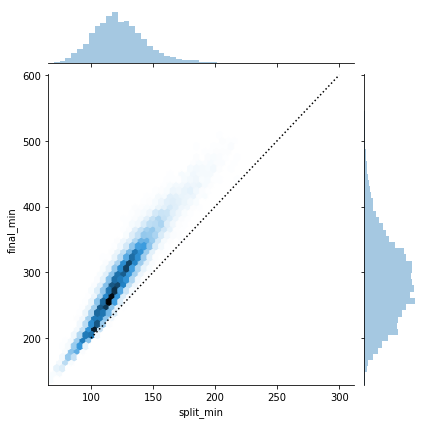

In [8]:
g = sns.jointplot(data=df, x='split_min', y='final_min', kind='hex')
g.ax_joint.plot(np.linspace(100, 300), np.linspace(200, 600), ':k')  # Make a reference y=2x line

In [9]:
df.head()

,age,gender,split,final,split_min,final_min
0,33,M,01:05:38,02:08:51,65.633333,128.850000
1,32,M,01:06:26,02:09:28,66.433333,129.466667
2,31,M,01:06:49,02:10:42,66.816667,130.700000
3,38,M,01:06:16,02:13:45,66.266667,133.750000
4,31,M,01:06:32,02:13:59,66.533333,133.983333


In [10]:
df['split_fract'] = 1 - 2 * df.split_min / df.final_min
df.head()

,age,gender,split,final,split_min,final_min,split_fract
0,33,M,01:05:38,02:08:51,65.633333,128.850000,-0.018756
1,32,M,01:06:26,02:09:28,66.433333,129.466667,-0.026262
2,31,M,01:06:49,02:10:42,66.816667,130.700000,-0.022443
3,38,M,01:06:16,02:13:45,66.266667,133.750000,0.009097
4,31,M,01:06:32,02:13:59,66.533333,133.983333,0.006842


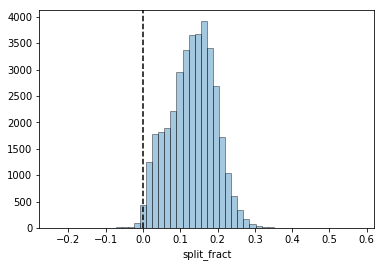

In [11]:
# Do a distplot of the split fract, don't show kernel density

sns.distplot(df['split_fract'], kde=False, hist_kws={'edgecolor': 'k'})
plt.axvline(0, color='k', linestyle='--');

In [12]:
sum(df.split_fract < 0)

251

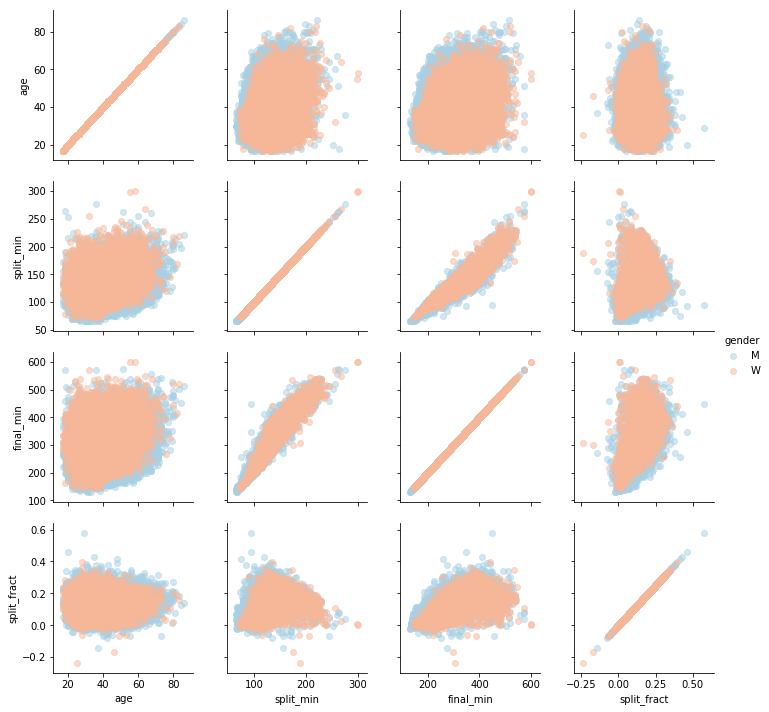

In [13]:
# Make a pairgrid.
g = sns.PairGrid(df, vars=['age', 'split_min', 'final_min', 'split_fract'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.5);
g.add_legend();

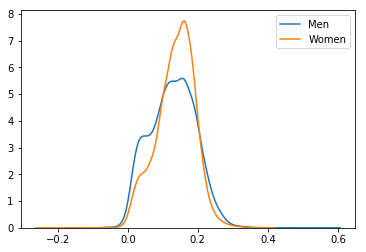

In [22]:
# Look at histogram of split fractions between men and women
sns.kdeplot(df.split_fract[df.gender=='M'], label='Men')
sns.kdeplot(df.split_fract[df.gender=='W'], label='Women')

In [23]:
df.head()

,age,gender,split,final,split_min,final_min,split_fract
0,33,M,01:05:38,02:08:51,65.633333,128.850000,-0.018756
1,32,M,01:06:26,02:09:28,66.433333,129.466667,-0.026262
2,31,M,01:06:49,02:10:42,66.816667,130.700000,-0.022443
3,38,M,01:06:16,02:13:45,66.266667,133.750000,0.009097
4,31,M,01:06:32,02:13:59,66.533333,133.983333,0.006842


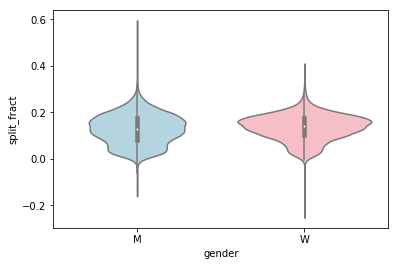

In [26]:
# make a violinplot

sns.violinplot(x='gender', y='split_fract', data=df,
              palette=['lightblue', 'lightpink'])

In [28]:
df['age_dec'] = df.age.map(lambda age: 10 * (age // 10))

In [30]:
men = df[df.gender == 'M']
women = df[df.gender == 'W']

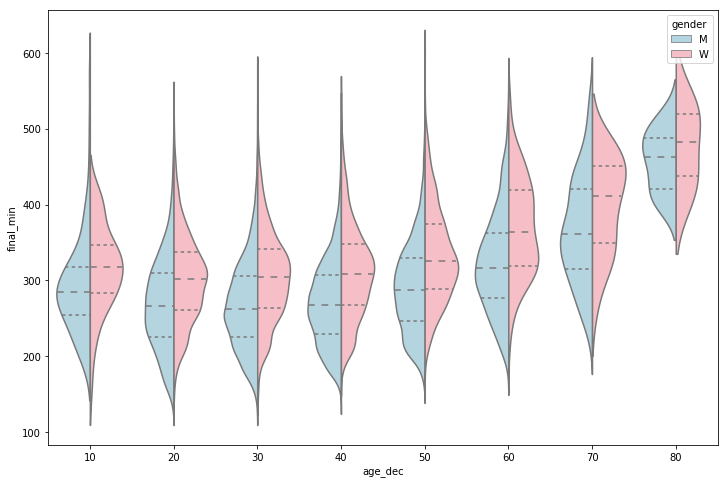

In [50]:
fig = plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='age_dec', y='final_min', hue='gender', 
              split=True, inner='quartile', 
              palette=['lightblue', 'lightpink'],
              );

In [51]:
df.head()

,age,gender,split,final,split_min,final_min,split_fract,age_dec
0,33,M,01:05:38,02:08:51,65.633333,128.850000,-0.018756,30
1,32,M,01:06:26,02:09:28,66.433333,129.466667,-0.026262,30
2,31,M,01:06:49,02:10:42,66.816667,130.700000,-0.022443,30
3,38,M,01:06:16,02:13:45,66.266667,133.750000,0.009097,30
4,31,M,01:06:32,02:13:59,66.533333,133.983333,0.006842,30


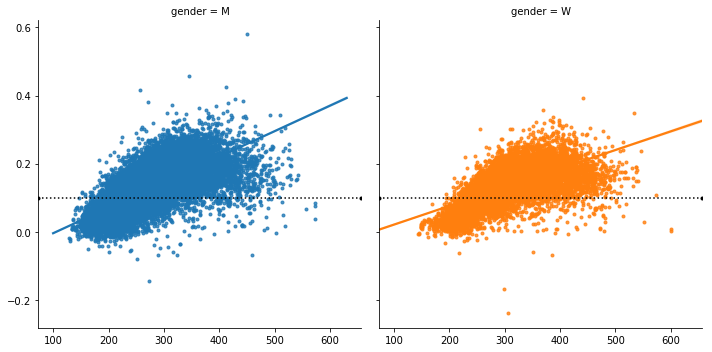

In [59]:
g = sns.lmplot('final_min', 'split_fract', col='gender', data=df,
              markers='.', hue='gender')

g.map(plt.axhline, y=0.1, color='k', ls=':');